# HW03- Simple Regression with Real Estate Data

## Simple Linear Regression
Simple linear regression is a stastistical method used to model the relationship between a dependent variable and one independent variable and are most commonly used. 
Mathematically, it can be expressed as:
$$y = \beta_0 + \beta_1 x + \epsilon$$
where:
- $y$ is the dependent variable (response variable)
- $x$ is the independent variable (predictor variable)
- $\beta_0$ is the y-intercept of the regression line
- $\beta_1$ is the slope of the regression line
- $\epsilon$ is the error term (residuals)

There are several assumptions that need to be met for simple linear regression to be valid:
1. **Linearity**: The relationship between the independent and dependent variable is linear.
2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: The residuals (errors) have constant variance across all levels of the independent variable.
4. **Normality**: The residuals are normally distributed.

If these assumptions are not met, the results of the regression analysis may be invalid or misleading.

In order to check these assumptions, we can use various diagnostic plots and statistical tests.
1. **Linearity**: We can use scatter plots to visualize the relationship between the independent and dependent variables.
2. **Independence**: We can check the independence of observations by examining the data collection process and ensuring that there is no autocorrelation.  
3. **Homoscedasticity**: We can use residual plots to check for constant variance of the residuals.
4. **Normality**: We can use Q-Q plots or statistical tests like the Shapiro-Wilk test to check if the residuals are normally distributed.

If assumptions are violated, we may need to consider alternative regression methods or transformations of the data.If assumptions are met, then we will focuse on the accuracy of the model, which can be evaluated using various metrics such as R-squared, adjusted R-squared, and root mean squared error (RMSE).
1. **R-squared**: This metric indicates the proportion of variance in the dependent variable that can be explained by the independent variable. It ranges from 0 to 1, with higher values indicating a better fit.
2. **Adjusted R-squared**: This metric adjusts the R-squared value for the number of predictors in the model, providing a more accurate measure of model fit when multiple independent variables are used.
3. **Root Mean Squared Error (RMSE)**: This metric measures the average magnitude of the residuals, providing an indication of how well the model predicts the dependent variable. Lower RMSE values indicate a better fit.

while r-squared and adjusted r-squared are useful for evaluating the overall fit of the model, RMSE is particularly useful for assessing the accuracy of predictions made by the model. It is always not necessary that having a high R-squared value means that the model is accurate, as it may be overfitting the data. That is why RMSE is a more reliable metric for evaluating the accuracy of the model.
For this assignment, we will be more focused on the building a simple linear regression model using the real estate data and evaluating its performance using the metrics mentioned above.

**Importing Libraries and Loading Data**

we will be useing the following libraries:
1. `pandas`: for data manipulation and analysis
2. `numpy`: for numerical operations
3. `matplotlib.pyplot`: for data visualization
4. `seaborn`: for statistical data visualization
5. `statsmodels.api`: for statistical modeling and regression analysis
6. `statsmodels`: for statistical tests and diagnostics

And then after importing the libraries, we will load the real estate data from a CSV file using `pandas`. The dataset contains information about various properties, including their prices and features.




In [15]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels


# print(plt.style.available)
# given the list of available styles, i have chosen 'fivethirtyeight' for its clean and modern look
plt.style.use('fivethirtyeight')



In [16]:
# Importing the dataset
df_realestate = pd.read_csv('data/Real Estate Data - Week 3.csv',index_col=0,header=0)


### Section 5a: Create the X and y datasets and Simple Regression

Task in hand:
- create the X and y datasets where X is `Living Area Above Grade` and y is `Sale Price`
- create a simple linear regression model using `statsmodels` with name of model as `reg`.
- use the X to predict the model and name it `pred`.
- Use the model (reg) to create the residuals and name it `resid`
- Show the summary of the results

In [17]:
# Create the X and y datasets
X = df_realestate[['Living Area Above Grade']]
y = df_realestate['Sale Price']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the simple linear regression model
reg = sm.OLS(y, X).fit()

# Use the model to predict
pred = reg.predict(X)

# Calculate residuals
resid = y - pred

# Show the summary of the results
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1199.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          7.76e-190
Time:                        16:30:40   Log-Likelihood:                -17076.
No. Observations:                1390   AIC:                         3.416e+04
Df Residuals:                    1388   BIC:                         3.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

From the summary, we have a fitted model as:
$$y = 33690 + 96.93 \times \text{Living Area Above Grade}$$



## Section 5b:  Create a Regression Table
Task in hand:
- Creating a regression table which will allows us to view the X and y variables, along with what we predicted and the residual.
- Need to create a code block that creates a table that includes the following columns and name it `df_reg`:
- `Living Area Above Grade`
- `Sale Price`
- We need to concatenate the df_reg, pred, and resid and use the name df_reg as the final data set and print head.
- rename the colimns as `Sale Price Predicted` and `Residuals`.

In [18]:
# Create a regression table
df_reg = pd.concat([X['Living Area Above Grade'], y, pred, resid], axis=1)
df_reg.columns = ['Living Area Above Grade', 'Sale Price', 'Sale Price Predicted', 'Residuals']

# Display the first few rows of the regression table
print(df_reg.head(10))

    Living Area Above Grade  Sale Price  Sale Price Predicted      Residuals
Id                                                                          
1                      1710      208500         199432.115140    9067.884860
2                      1262      181500         156009.099394   25490.900606
3                      1786      223500         206798.519597   16701.480403
4                      1717      140000         200110.599761  -60110.599761
5                      2198      250000         246732.185862    3267.814138
6                      1362      143000         165701.736837  -22701.736837
7                      1694      307000         197881.293149  109118.706851
8                      2090      200000         236264.137424  -36264.137424
9                      1774      129900         205635.403103  -75735.403103
10                     1077      118000         138077.720124  -20077.720124


## Section 5C: Create a Regression Plot (regplot)
Task in hand:
- Create a regression plot to visually see the relationship between the `Living Area Above Grade` and `Sale Price`.
Need to include the following
- x is `Living Area Above Grade`
- y is `Sale Price`
- data is `df_reg`
- scatter_kws ={'color': 'green',"alpha" :0.15, 's': 50}
- line_kws = {'color': 'black'}
- put the titile as ` Regression Fit plot for Sale Price and Living Area`  with fontsize 18 pt and centered.
- xlabel as `Living Area Above Grade` with fontsize 14 pt and centred.
- ylabel as `Sale Price` with fontsize 14 pt and centred. 

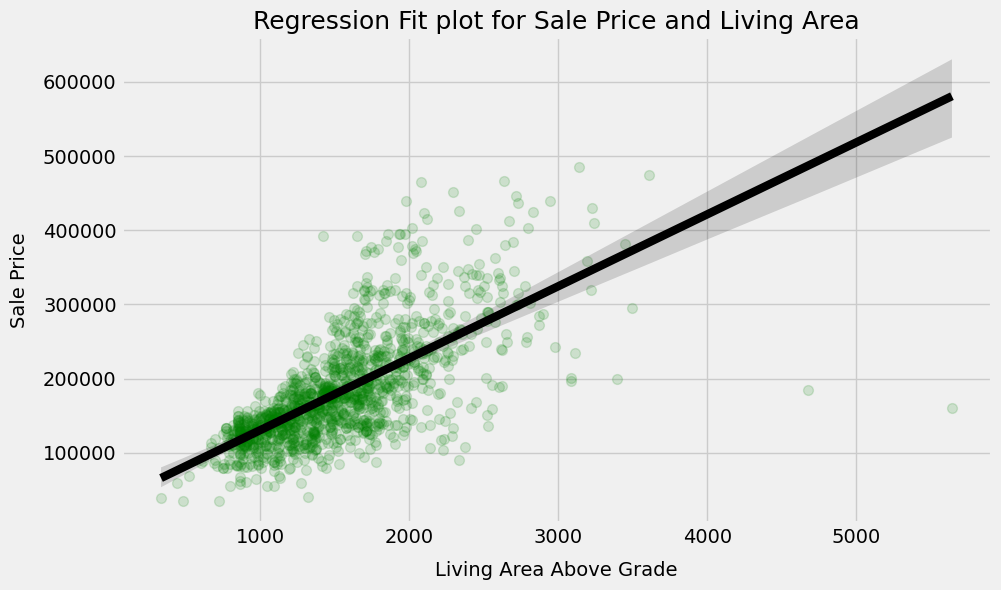

In [19]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Living Area Above Grade', y='Sale Price', data=df_reg,
            scatter_kws={'color': 'green', 'alpha': 0.15, 's': 50},
            line_kws={'color': 'black'})

# Add title and labels
plt.title('Regression Fit plot for Sale Price and Living Area', fontsize=18, loc='center')
plt.xlabel('Living Area Above Grade', fontsize=14, labelpad=10)
plt.ylabel('Sale Price', fontsize=14, labelpad=10)

# Show the plot
plt.show()

## Section 5D: Create a Residual Plot

A residual plot provides a visual representation of how well the model predicted the `Sale Price`. The line in the plot represents perfect predictions, and any dots deviating from the line indicate the magnitude of the prediction error for the actual `Sale Price`.

### Task:
- Create a residual plot (`residplot`) for `Living Area Above Grade` and `Sale Price`.
- The plot should resemble the structure and labeling.

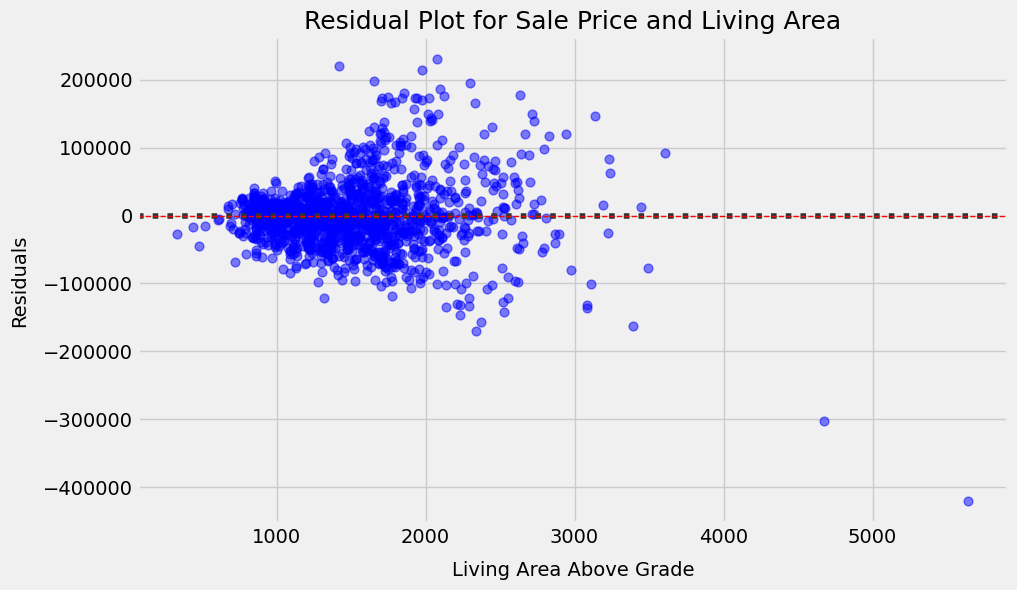

In [20]:
# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Living Area Above Grade', y='Sale Price', data=df_reg,
              scatter_kws={'color': 'blue', 'alpha': 0.5, 's': 40})

# Add title and labels
plt.title('Residual Plot for Sale Price and Living Area', fontsize=18, loc='center')
plt.xlabel('Living Area Above Grade', fontsize=14, labelpad=10)
plt.ylabel('Residuals', fontsize=14, labelpad=10)

# Show the plot
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

## Section 5e: Create a Regression Plot (lmplot) based on Garage Cars

An `lmplot` is a type of regression plot that allows you to visually explore the relationship between `Living Area Above Grade` and `Sale Price`, while also incorporating a categorical variable such as `Garage Cars`.

### Task:
- Create an `lmplot` with the following properties:
  - `x` is `Living Area Above Grade`
  - `y` is `Sale Price`
  - `col` is `Garage Cars`
  - `col_wrap` is 2
  - `data` is `df_realestate`
  - `palette` is `Set1`
  - `aspect` is 2
  - `scatter_kws` is `{"alpha": 0.15, "s": 150, "linewidth": 2, "edgecolor": "white"}`
  - `line_kws` is `{'color': 'red'}`





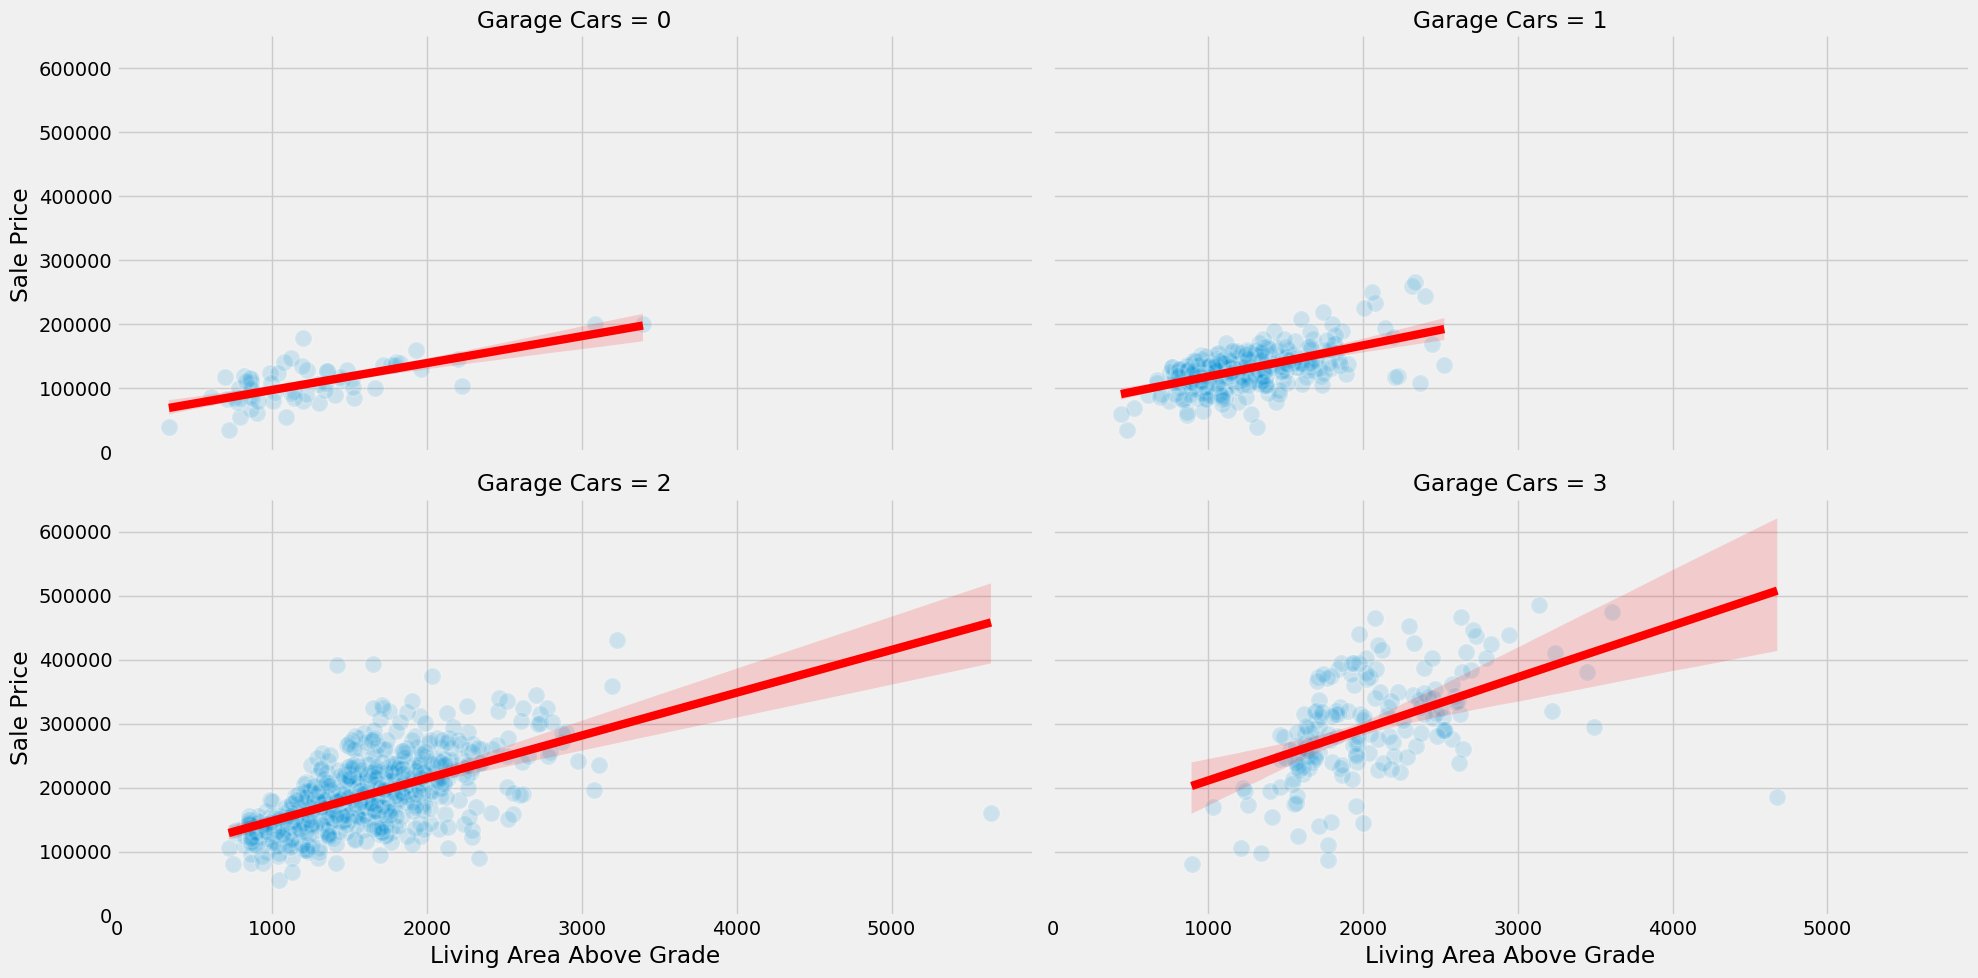

In [21]:
# Create an lmplot
sns.lmplot(x='Living Area Above Grade', y='Sale Price', col='Garage Cars',
           col_wrap=2, data=df_realestate, palette='Set1', aspect=2,
           scatter_kws={"alpha": 0.15, "s": 150, "linewidths": 2, "edgecolor": "white"},
           line_kws={'color': 'red'})

# Set x-axis and y-axis limits to start at zero
plt.xlim(left=0)
plt.ylim(bottom=0)

# Show the plot
plt.show()

## Section 5f: Explanation of Simple Regression Results

### Task in hand:
- Summarize the relationship between the feature (`Living Area Above Grade`) and the target variable (`Sale Price`).
- Indicate measures that explain the relationship, such as regression coefficients and R-squared value.
- Analyze what the plots reveal about the relationship, including trends and residuals.
- Provide a summary of the practical implications of the results in real-world terms.

### Summary of Results

1. **Dependent and Independent Variables**:
   - The dependent variable is `Sale Price`, and the independent variable is `Living Area Above Grade`.

2. **Regression Coefficients**:
   - The intercept (β₀) is 33,690, and the slope (β₁) is 96.93. This means that for every additional square foot of living area, the sale price increases by approximately $96.93.

3. **R-squared Value**:
   - The R-squared value is 0.463, indicating that approximately 46.3% of the variance in `Sale Price` is explained by `Living Area Above Grade`.

4. **P-values**:
   - The p-values for both the intercept (β₀) and the slope (β₁) are less than 0.05, indicating that both coefficients are statistically significant.

5. **Residual Plot Observations**:
   - The residuals tend to increase as `Living Area Above Grade` increases, suggesting potential heteroscedasticity.
   - There are a few large outliers visible in the residual plot, which may affect the model's accuracy.

6. **Regression Plot with Garage Cars as a Category**:
   - For `Garage Cars` categories 0 and 1, the model fits well, as indicated by the narrow confidence interval shadow around the regression line.
   - For `Garage Cars` categories 2 and 3, the model does not fit as well, as the confidence interval shadow is much wider, indicating greater uncertainty in the predictions.

7. **Practical Implications**:
   - Homebuyers and sellers can expect the sale price to increase with larger living areas, but the presence of outliers and the model's reduced accuracy for certain garage categories should be taken into consideration.
   - The significant p-values suggest that the relationship observed is not due to random chance, reinforcing the reliability of the model for predicting sale prices based on living area size.



# Multiple Linear Regression
Multiple linear regression is a statistical technique used to model the relationship between a dependent variable and multiple independent variables. It extends simple linear regression by allowing for more than one predictor variable, enabling a more comprehensive analysis of how various factors influence the dependent variable.
Mathematically, multiple linear regression can be expressed as: 
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$
where:
- $y$ is the dependent variable (response variable)
- $x_1, x_2, ..., x_n$ are the independent variables (predictor variables)
- $\beta_0$ is the y-intercept of the regression plane
- $\beta_1, \beta_2, ..., \beta_n$ are the slopes of the regression plane for each independent variable
- $\epsilon$ is the error term (residuals)
In multiple linear regression, the assumptions are similar to those of simple linear regression, but with additional considerations:
1. **Linearity**: The relationship between each independent variable and the dependent variable is linear.
2. **Independence**: The observations are independent of each other.


### Section 6a: Multiple Regression for Sale Price with Living Area Above Grade and Garage Cars

Task in hand:
- Define the independent variables (X) as `Living Area Above Grade` and `Garage Cars`, and the dependent variable (y) as `Sale Price`.
- Add a constant to the independent variables.
- Fit a multiple regression model using `statsmodels` and name it `reg2`.
- Use the model to predict and name the predictions `pred2`.
- Calculate the residuals and name them `resid2`.
- Display the summary of the regression results.

In [22]:
# Define the independent variables (X) and dependent variable (y)
X = df_realestate[['Living Area Above Grade', 'Garage Cars']]
y = df_realestate['Sale Price']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
reg2 = sm.OLS(y, X).fit()

# Use the model to predict
pred2 = reg2.predict(X)

# Calculate residuals
resid2 = y - pred2

# Display the summary of the regression results
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          5.79e-292
Time:                        16:30:41   Log-Likelihood:                -16837.
No. Observations:                1390   AIC:                         3.368e+04
Df Residuals:                    1387   BIC:                         3.370e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

### Section 6b: Create a Regression Table for Multiple Regression

Task in hand:
- Create a table that includes the following columns and name it `df_reg2`:
  - `Living Area Above Grade` from `df_realestate`
  - `Garage Cars` from `df_realestate`
  - `Sale Price` from `df_realestate`
- Concatenate `df_reg2`, `pred2`, and `resid2` and use the name `df_reg2` as the final dataset.
- View the `.head(10)` for `df_reg2`.
- Rename column headings to match Figure 6.

In [23]:
# Create a table with specified columns
df_reg2 = pd.concat([df_realestate[['Living Area Above Grade', 'Garage Cars', 'Sale Price']], pred2, resid2], axis=1)

# Rename columns to match Figure 6
df_reg2.columns = ['Living Area Above Grade', 'Garage Cars', 'Sale Price', 'Sale Price Predicted', 'Residuals']

# View the first 10 rows of the table
print(df_reg2.head(10))

    Living Area Above Grade  Garage Cars  Sale Price  Sale Price Predicted  \
Id                                                                           
1                      1710            2      208500         203768.988587   
2                      1262            2      181500         173008.762367   
3                      1786            2      223500         208987.241249   
4                      1717            3      140000         248612.021697   
5                      2198            3      250000         281638.068152   
6                      1362            2      143000         179874.884291   
7                      1694            2      307000         202670.409079   
8                      2090            2      200000         229860.251899   
9                      1774            2      129900         208163.306619   
10                     1077            1      118000         115944.032233   

        Residuals  
Id                 
1     4731.011413  
2  

### Section 6c: Create a Regression Plot (regplot)

Task in hand:
- Create a subplot with two regression plots (similar to Figure 7):
  - `Living Area Above Grade` vs. `Sale Price`
  - `Garage Cars` vs. `Sale Price`
- Use `df_reg2` as the data source for both plots.

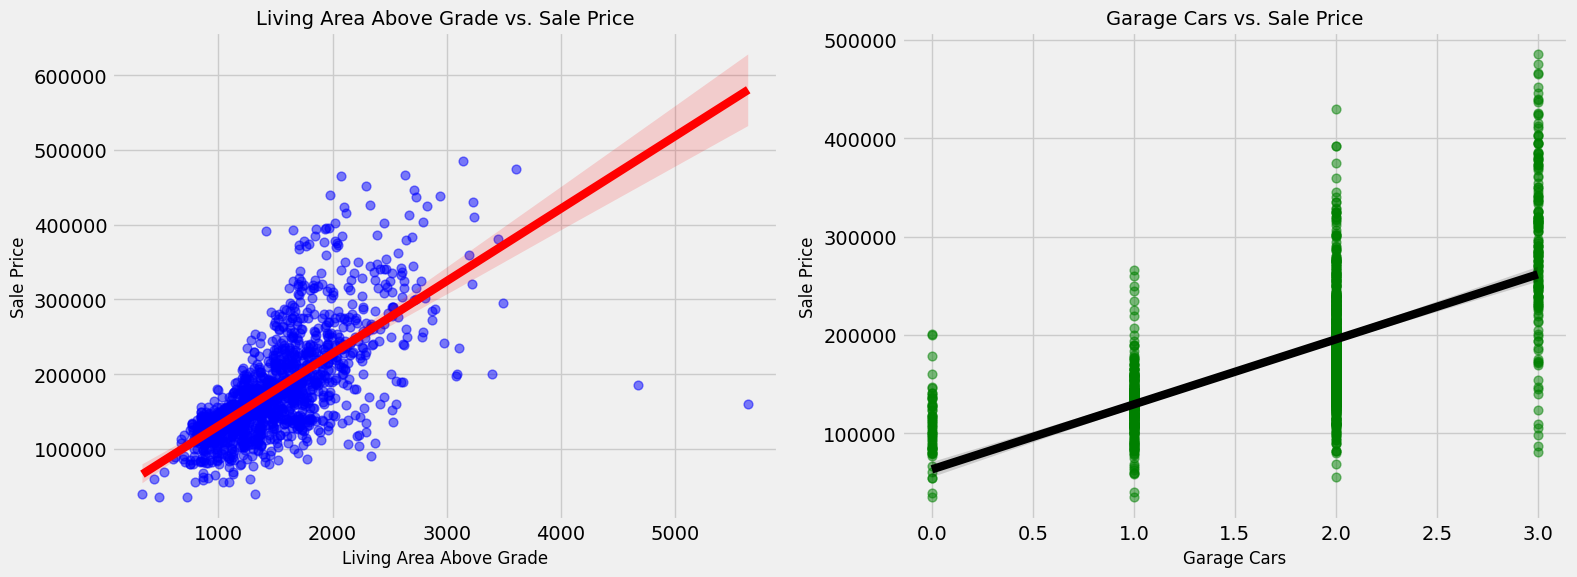

In [24]:
# Create a subplot with two regression plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regression plot for 'Living Area Above Grade' vs. 'Sale Price'
sns.regplot(x='Living Area Above Grade', y='Sale Price', data=df_reg2, ax=axes[0],
            scatter_kws={'color': 'blue', 'alpha': 0.5, 's': 40},
            line_kws={'color': 'red'})
axes[0].set_title('Living Area Above Grade vs. Sale Price', fontsize=14)
axes[0].set_xlabel('Living Area Above Grade', fontsize=12)
axes[0].set_ylabel('Sale Price', fontsize=12)

# Regression plot for 'Garage Cars' vs. 'Sale Price'
sns.regplot(x='Garage Cars', y='Sale Price', data=df_reg2, ax=axes[1],
            scatter_kws={'color': 'green', 'alpha': 0.5, 's': 40},
            line_kws={'color': 'black'})
axes[1].set_title('Garage Cars vs. Sale Price', fontsize=14)
axes[1].set_xlabel('Garage Cars', fontsize=12)
axes[1].set_ylabel('Sale Price', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

### Section 6d: Create a Joint Plot (jointplot)

Task in hand:
- Create a jointplot for `Sale Price Predicted`.
  - `kind` is set to `reg`.
  - `data` is `df_reg2`.
  - `ratio` is 5.
  - `height` is 8.

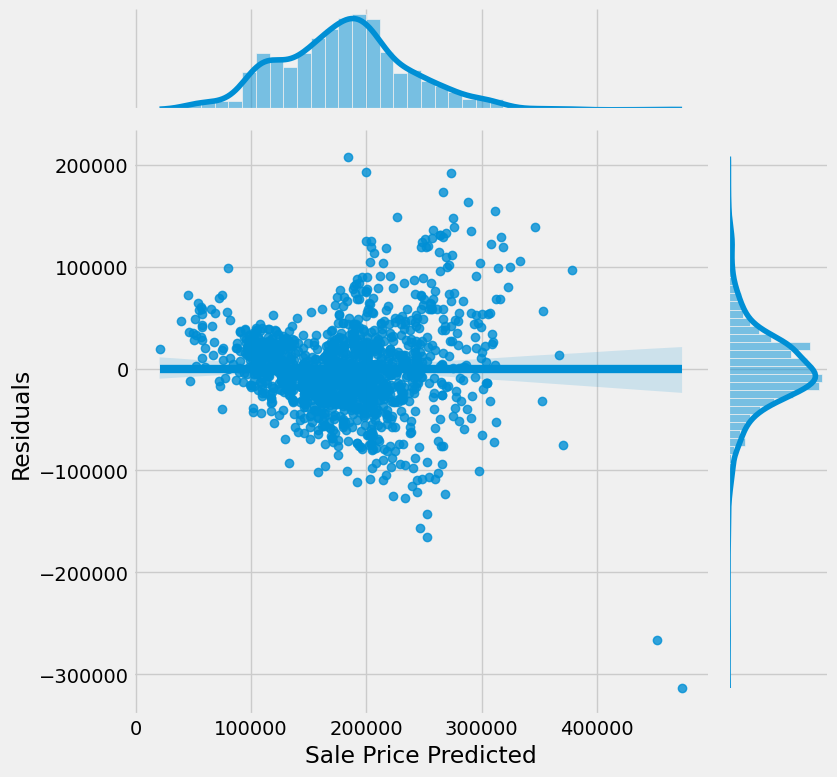

In [26]:
# Create a jointplot for 'Sale Price Predicted' vs. 'Residuals'
sns.jointplot(x='Sale Price Predicted', y='Residuals', data=df_reg2, kind='reg', ratio=5, height=8)

### Section 6e: Create a Residual Plot (residplot) based on Kitchen Quality

Task in hand:
- Add `df_realestate['Kitchen Qual']` to `df_reg2`.
- Create a residual plot (`residplot`) with the following properties:
  - `x` is `Sale Price Predicted`
  - `y` is `Residual`
  - `col` is `Kitchen Qual`
  - `col_wrap` is 2
  - `data` is `df_reg2`
  - `palette` is `"Set1"`
  - `aspect` is 2
  - `scatter_kws` is `{"alpha": 0.15, "s": 150, "linewidth": 2, "edgecolor": "white"}`
  - `line_kws` is `{'color': 'red'}`

In [ ]:
# Add 'Kitchen Qual' to df_reg2 and ensure it is properly converted to a categorical type
df_realestate['Kitchen Qual'] = df_realestate['Kitchen Qual'].astype('category')
df_realestate['Kitchen Qual'] = df_realestate['Kitchen Qual'].astype(str)  # Convert to string for compatibility
df_reg2 = pd.concat([df_reg2, df_realestate['Kitchen Qual']], axis=1)

# Verify the unique values in 'Kitchen Qual'
print(df_realestate['Kitchen Qual'].unique())

# Create a residplot based on 'Kitchen Qual'
sns.lmplot(x='Sale Price Predicted', y='Residuals', col='Kitchen Qual',
           col_wrap=2, data=df_reg2, palette='Set1', aspect=2,
           scatter_kws={"alpha": 0.15, "s": 150, "linewidths": 2, "edgecolor": "white"},
           line_kws={'color': 'red'})

# Show the plot
plt.show()

['Good', 'Average', 'Excellent', 'Fair']
Categories (4, object): ['Average', 'Excellent', 'Fair', 'Good']


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().